# Density Based Scanning

<a href="">Notebook github repo link</a>

![example1.png](example1.png)

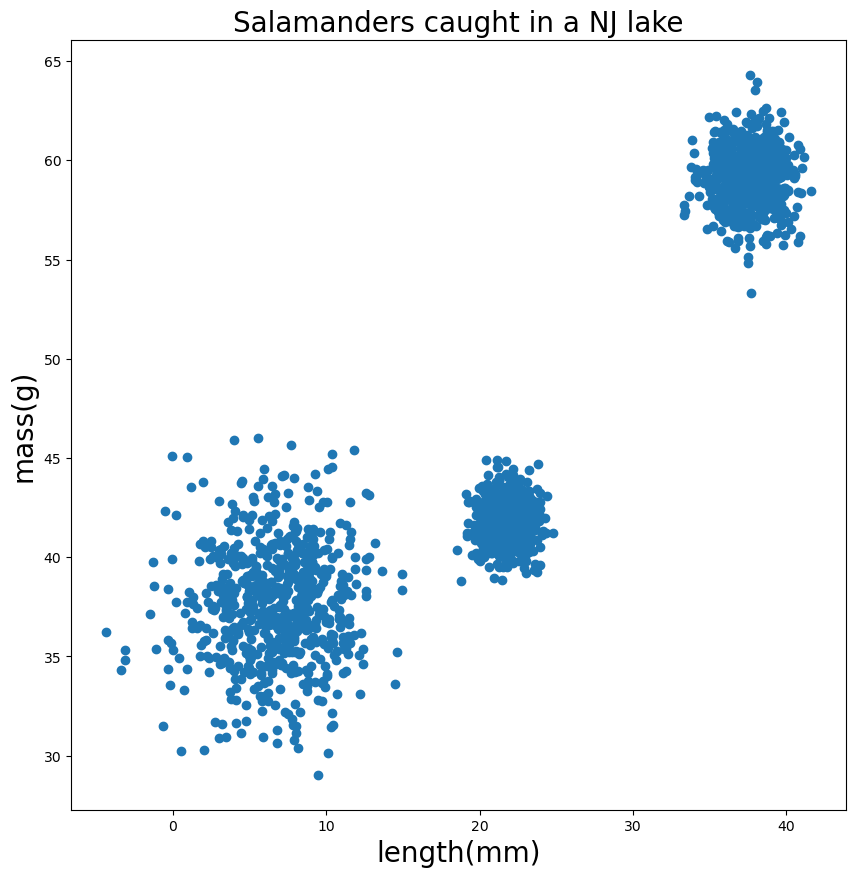

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('db_clustering_salamanders_example1.csv',index_col=0)
plt.figure(figsize=(10,10))
plt.scatter(df[df.columns[0]],df[df.columns[1]])
plt.xlabel(df.columns[0],fontsize=20)
plt.ylabel(df.columns[1],fontsize=20)
plt.title('Salamanders caught in a NJ lake',fontsize=20)
plt.savefig('example1.png')
plt.show()

In [13]:
def compare_x_y(data,x_axis,y_axis,legend=False):
    colors = {'species 0': (0,'red'), 'species 1': (1,'green'), 'species 2': (2,'blue')}
    for key,values in colors.items():
        plt.scatter(x=data[data['species']==values[0]][x_axis], y=data[data['species']==values[0]][y_axis], c=values[1], label=key)
    plt.xlabel(x_axis,fontsize=15)
    plt.ylabel(y_axis,fontsize=15)
    if legend:
        plt.legend(fontsize=12)
    plt.show()

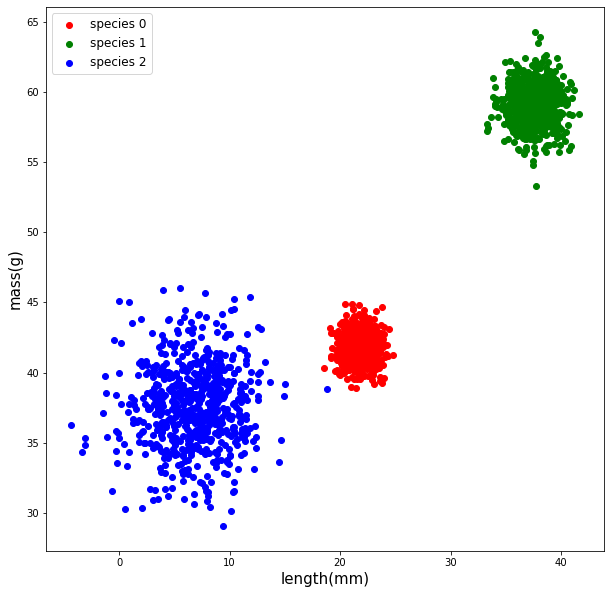

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,10))
compare_x_y(df,'length(mm)','mass(g)',legend=True)
plt.savefig('example1-labels.png')

Estimated no. of clusters: 52
Estimated no. of noise points: 1651
v_measure = 0.18775097241771865


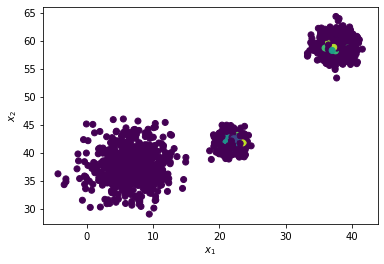

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

X = df.drop('species',axis=1)
y = df['species']
dbscan_cluster = DBSCAN(eps=0.1, min_samples=4)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[X.columns[0]], X[X.columns[1]], c=dbscan_cluster.labels_,label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

# https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/

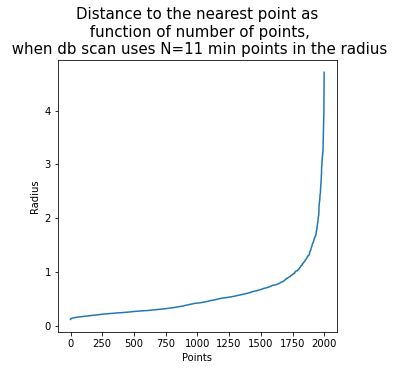

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


n=11
nearest_neighbors = NearestNeighbors(n_neighbors=n)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,n-1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Radius")
plt.title('Distance to the nearest point as\n function of number of points,\n when db scan uses N={} min points in the radius'.format(n),fontsize=15)
plt.show()

Epsilon : 0.9560256092157733


<Figure size 720x720 with 0 Axes>

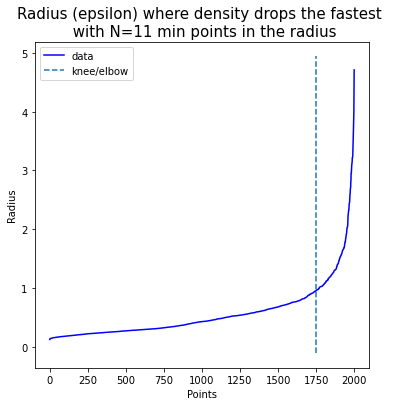

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nearest_neighbors = NearestNeighbors(n_neighbors=n)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,n-1], axis=0)


from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(10, 10))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Radius")
plt.title('Radius (epsilon) where density drops the fastest \n with N={} min points in the radius'.format(n),fontsize=15)

print('Epsilon :',distances[knee.knee])
plt.show()

In [9]:
def compare_x_y(data,legend=False):
    colors =  {-1:('non-core point','black'),0:('species 1','red'),1:('species 2','green'),2:('species 3','yellow')}
    target='cluster'
    x_axis='length(mm)'
    y_axis='mass(g)'
    for key,values in colors.items():
        plt.scatter(x=data[data[target]==key][x_axis], y=data[data[target]==key][y_axis], c=values[1], label=values[0])
    plt.xlabel(x_axis,fontsize=15)
    plt.ylabel(y_axis,fontsize=15)
    if legend:
        plt.legend(fontsize=12)
    plt.show()

<Figure size 720x720 with 0 Axes>

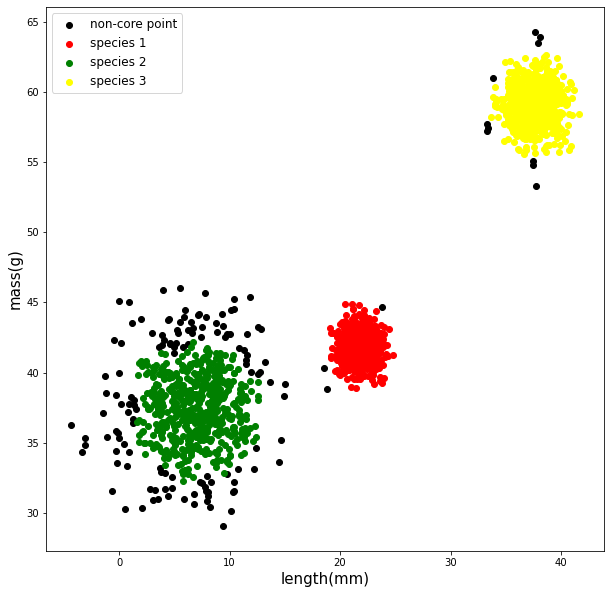

Number of min points:  11
Radius (epsilon) for DB scan:  0.9560256092157733
Estimated no. of clusters: 3
Estimated no. of noise points: 141
v_measure = 0.9073273488380319


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

X = df.drop('species',axis=1)
y = df['species']
dbscan_cluster = DBSCAN(eps=distances[knee.knee], min_samples=n)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
X2 = X.copy()
X2['cluster'] = dbscan_cluster.labels_

plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
compare_x_y(X2,True)


print("Number of min points: ",n)
print('Radius (epsilon) for DB scan: ',distances[knee.knee])

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))
plt.show()